In [1]:
# import pandas library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Build model using LinearRegression

In [2]:
cars = pd.read_csv("final_cars.csv")

In [3]:
cars.columns

Index(['engine-size', 'horsepower', 'city-mpg', 'price', 'fuel-type_diesel',
       'fuel-type_gas', 'num-of-doors_four', 'num-of-doors_two',
       'body-style_convertible', 'body-style_hardtop', 'body-style_hatchback',
       'body-style_sedan', 'body-style_wagon', 'drive-wheels_4wd',
       'drive-wheels_fwd', 'drive-wheels_rwd'],
      dtype='object')

In [4]:
cars.head()

,engine-size,horsepower,city-mpg,price,fuel-type_diesel,fuel-type_gas,num-of-doors_four,num-of-doors_two,body-style_convertible,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon,drive-wheels_4wd,drive-wheels_fwd,drive-wheels_rwd
0,130,111.0,21,13495.0,0,1,0,1,1,0,0,0,0,0,0,1
1,130,111.0,21,16500.0,0,1,0,1,1,0,0,0,0,0,0,1
2,152,154.0,19,16500.0,0,1,0,1,0,0,1,0,0,0,0,1
3,109,102.0,24,13950.0,0,1,1,0,0,0,0,1,0,0,1,0
4,136,115.0,18,17450.0,0,1,1,0,0,0,0,1,0,1,0,0


In [5]:
## create X and Y
y = cars['price']
X = cars.drop(columns=['price'])

In [6]:
X.shape,y.shape

((201, 15), (201,))

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [12]:
model = LinearRegression(normalize=True)
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [13]:
# Display coefficient for each column
for t in zip(X_train.columns, model.coef_):
  print(f"{t[0]:25s} {t[1]}")

engine-size               100.99302438360539
horsepower                32.155816478179766
city-mpg                  -178.2783833556081
fuel-type_diesel          1999.7517116799982
fuel-type_gas             -1999.7517116799913
num-of-doors_four         96.14226696259188
num-of-doors_two          -96.14226696259166
body-style_convertible    2127.0522190835177
body-style_hardtop        496.45603674308114
body-style_hatchback      -905.453407245509
body-style_sedan          690.8953396571128
body-style_wagon          -409.83142930198636
drive-wheels_4wd          -985.8276890500168
drive-wheels_fwd          -859.5719929232353
drive-wheels_rwd          1007.2431775705164


In [14]:
model.intercept_

3174.2171584659973

### Calculate accuracy with train data

In [17]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
y_pred = model.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,y_pred)))

3206.7583961638893


In [18]:
r2score = r2_score(y_train,y_pred)
print(f"R2 Score: {r2score:0.2f}")

R2 Score: 0.83


### Test with test data

In [21]:
y_pred = model.predict(X_test)

In [22]:
## get MSE 
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

mse = mean_squared_error(y_test,y_pred)
print(f"Mean Squared Error : {mse:0.2f}")

mae = mean_absolute_error(y_test,y_pred)
print(f"Mean Absolute Error : {mae:0.2f}")

r2score = r2_score(y_test,y_pred)
print(f"R2 Score: {r2score:0.2f}")

Mean Squared Error : 13095656.40
Mean Absolute Error : 2744.90
R2 Score: 0.83


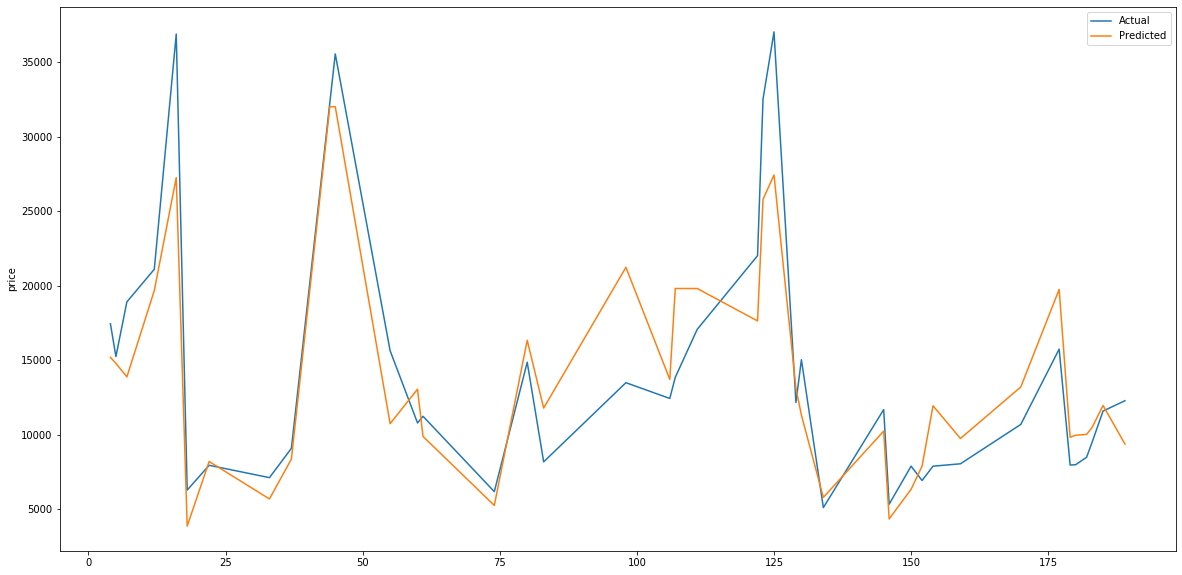

In [23]:
# Compare actual and predicted values
plt.gcf().set_size_inches(20,10)
sns.lineplot( y = y_test, x = X_test.index, label="Actual")
sns.lineplot( y = y_pred, x = X_test.index, label="Predicted")

In [25]:
for p,a in zip(y_pred,y_test):
    print(f"{p:.2f}  -  {a:.2f}")

3879.00  -  6295.00
13209.69  -  10698.00
19816.31  -  13860.00
21238.62  -  13499.00
19756.91  -  15750.00
10029.90  -  8495.00
14794.55  -  15250.00
4358.57  -  5348.00
19678.61  -  21105.00
7901.80  -  6938.00
9892.58  -  11245.00
27430.79  -  37028.00
9973.56  -  7995.00
11949.93  -  7898.00
16343.51  -  14869.00
13886.11  -  18920.00
5700.15  -  7129.00
11326.75  -  15040.00
8374.41  -  9095.00
5264.62  -  6189.00
10488.05  -  9495.00
10251.09  -  11694.00
32010.19  -  35550.00
9754.61  -  8058.00
13062.53  -  10795.00
25800.19  -  32528.00
9837.61  -  7975.00
11969.39  -  11595.00
17641.05  -  22018.00
32010.19  -  32250.00
27254.47  -  36880.00
10748.14  -  15645.00
6346.45  -  7898.00
19816.31  -  17075.00
8211.83  -  7957.00
9382.20  -  12290.00
13115.38  -  12170.00
15199.63  -  17450.00
11795.83  -  8189.00
13719.01  -  12440.00
5801.74  -  5118.00


### Micro model with 2 features 

In [26]:
# Micro model
X_micro =  X[['engine-size','city-mpg']]
y_micro =  y

In [27]:
X_micro_train, X_micro_test, y_micro_train, y_micro_test = train_test_split(X_micro,y_micro, test_size=0.2, random_state=0)

In [28]:
micro_model = LinearRegression(normalize=True)
micro_model.fit(X_micro_train,y_micro_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [29]:
micro_model.score(X_micro_train,y_micro_train) # r2 for train data 

0.7754615970810945

In [30]:
y_micro_pred = micro_model.predict(X_micro_test)

In [31]:
r2score = r2_score(y_micro_test,y_micro_pred)
print(f"R2 Score: {r2score:0.2f}")

R2 Score: 0.81


## Regularization 

In [39]:
from sklearn.linear_model import LassoCV

In [61]:
lm = LassoCV(alphas=[1.0,0.10], cv=5, normalize=True)
lm.fit(X,y)

LassoCV(alphas=[1.0, 0.1], copy_X=True, cv=5, eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=100, n_jobs=None, normalize=True,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [62]:
lm.coef_

array([ 9.49019236e+01,  5.18445740e+01, -1.30263344e+02,  3.02571565e+03,
       -1.84106312e-11,  3.55975414e+02, -7.29327490e-14,  2.80266599e+03,
        4.55630233e+02, -1.21618859e+03,  0.00000000e+00, -1.09101681e+03,
        0.00000000e+00, -7.84944426e+02,  1.25009125e+03])

In [63]:
y_pred = lm.predict(X_test)

In [64]:
r2score = r2_score(y_test,y_pred)
print(f"R2 Score: {r2score:0.2f}")

R2 Score: 0.87


## RandomForestRegressor 

In [63]:
from sklearn.ensemble import RandomForestRegressor

In [64]:
model = RandomForestRegressor()
model.fit(X_train, y_train)
print('Train score ', model.score(X_train,y_train))
y_pred = model.predict(X_test)
r2score = r2_score(y_test,y_pred)
print(f"R2 Score: {r2score:0.2f}")

Train score  0.9772260873751211
R2 Score: 0.93


e:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


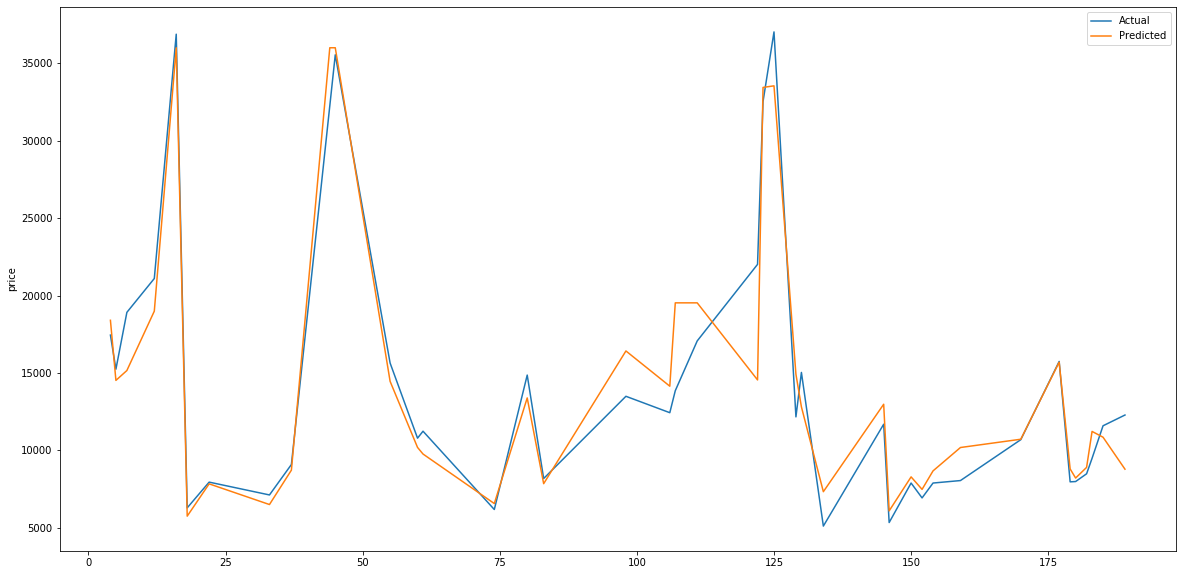

In [65]:
# Compare actual and predicted values
plt.gcf().set_size_inches(20,10)
sns.lineplot( y = y_test, x = X_test.index, label="Actual")
sns.lineplot( y = y_pred, x = X_test.index, label="Predicted")

### SGDRegressor

In [97]:
cars = pd.read_csv("final_cars.csv")

In [98]:
from sklearn.linear_model import SGDRegressor

In [99]:
cars.head()

,engine-size,horsepower,city-mpg,highway-mpg,price,fuel-type_diesel,fuel-type_gas,num-of-doors_four,num-of-doors_two,body-style_convertible,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon,drive-wheels_4wd,drive-wheels_fwd,drive-wheels_rwd
0,130,111.0,21,27,13495.0,0,1,0,1,1,0,0,0,0,0,0,1
1,130,111.0,21,27,16500.0,0,1,0,1,1,0,0,0,0,0,0,1
2,152,154.0,19,26,16500.0,0,1,0,1,0,0,1,0,0,0,0,1
3,109,102.0,24,30,13950.0,0,1,1,0,0,0,0,1,0,0,1,0
4,136,115.0,18,22,17450.0,0,1,1,0,0,0,0,1,0,1,0,0


In [100]:
# create X and Y
y = cars['price']
X = cars.drop(columns=['price'])

In [101]:
## scale values
from sklearn.preprocessing import scale
X['engine-size'] = scale(X['engine-size'])
X['horsepower'] = scale(X['horsepower'])
X['city-mpg'] = scale(X['city-mpg'])
X['highway-mpg'] = scale(X['highway-mpg'])

In [102]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [103]:
model = SGDRegressor(random_state=100)
model.fit(X_train,y_train)
print('Train score ', model.score(X_train,y_train))
y_pred = model.predict(X_test)
r2score = r2_score(y_test,y_pred)
print(f"R2 Score: {r2score:0.2f}")

Train score  0.8260006054363602
R2 Score: 0.80


In [104]:
for t in zip(y_test,y_pred):
    print(t)

(6295.0, 4263.098425071112)
(10698.0, 12850.680342098283)
(13860.0, 20250.20288777954)
(13499.0, 21100.563763725222)
(15750.0, 19821.693156414654)
(8495.0, 9863.644647468653)
(15250.0, 14839.213004280005)
(5348.0, 4986.850989202901)
(21105.0, 19663.41822543165)
(6938.0, 7836.861082550077)
(11245.0, 9817.75262565415)
(37028.0, 24678.89766887282)
(7995.0, 8609.997513769908)
(7898.0, 11942.333275220186)
(14869.0, 16229.221087286212)
(18920.0, 13734.804155179918)
(7129.0, 6189.09054671481)
(15040.0, 10998.969942167507)
(9095.0, 8431.373655679588)
(6189.0, 5235.971704736604)
(9495.0, 9781.812023605191)
(11694.0, 10437.50529958781)
(35550.0, 32402.46440539986)
(8058.0, 10551.331036739874)
(10795.0, 12261.18837433054)
(32528.0, 24587.547207484335)
(7975.0, 9848.553381920114)
(11595.0, 10192.700361203435)
(22018.0, 17241.84934878419)
(32250.0, 32402.46440539986)
(36880.0, 27257.29384827056)
(15645.0, 10372.687300743444)
(7898.0, 5911.718414543523)
(17075.0, 20250.20288777954)
(7957.0, 8090.308

## Lasoo 

In [39]:
from sklearn.linear_model import LassoCV

In [40]:
model = LassoCV(cv=5)
model.fit(X_train,y_train)
print('Train score ', model.score(X_train,y_train))
y_pred = model.predict(X_test)
r2score = r2_score(y_test,y_pred)
print(f"R2 Score: {r2score:0.2f}")

Train score  0.7995214551898788
R2 Score: 0.82
